In [2]:
%pip install openpyxl

  Using cached openpyxl-3.1.5-py2.py3-none-any.whl.metadata (2.5 kB)
  Using cached et_xmlfile-2.0.0-py3-none-any.whl.metadata (2.7 kB)
Using cached openpyxl-3.1.5-py2.py3-none-any.whl (250 kB)
Using cached et_xmlfile-2.0.0-py3-none-any.whl (18 kB)

   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   ---------------------------------------- 2/2 [openpyxl]

Note: you may need to restart the kernel to use updated packages.


Validation set 평가결과
MSE: 2.1055828526481384
RMSE: 1.4510626632396475
R Squared: 0.9126050788382798


c:\Users\mojih\OneDrive\바탕 화면\project2\model\metrics.py:22: UserWarning: Glyph 49892 (\N{HANGUL SYLLABLE SIL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\mojih\OneDrive\바탕 화면\project2\model\metrics.py:22: UserWarning: Glyph 51228 (\N{HANGUL SYLLABLE JE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\mojih\OneDrive\바탕 화면\project2\model\metrics.py:22: UserWarning: Glyph 51008 (\N{HANGUL SYLLABLE EUN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\mojih\OneDrive\바탕 화면\project2\model\metrics.py:22: UserWarning: Glyph 53748 (\N{HANGUL SYLLABLE TOE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\mojih\OneDrive\바탕 화면\project2\model\metrics.py:22: UserWarning: Glyph 45208 (\N{HANGUL SYLLABLE NA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\mojih\OneDrive\바탕 화면\project2\model\metrics.py:22: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users

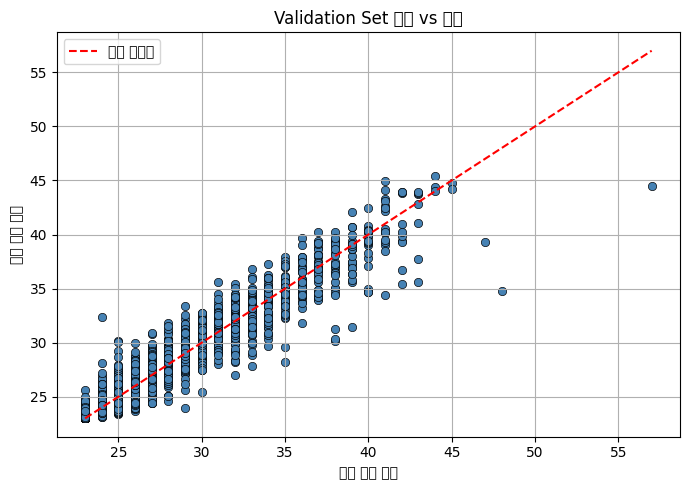

In [4]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# 데이터 불러오기
df = pd.read_csv("mlb최종.csv", encoding="cp949")

# 타겟 생성: 은퇴 나이
df['retire_age'] = df['retire_year'] - df['birth_year']
df_clean = df.dropna()

# 사용할 feature 컬럼 정의
feature_cols = ['G', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'RBI', 'R', 'SB', 'CS', 'AVG', 'OBP', 'SLG', 'OPS']
X = df_clean[feature_cols]
y = df_clean['retire_age']

# 정규화 및 분할
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 모델 학습
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_val)

from metrics import print_regression_metrcis
print_regression_metrcis(
    y_val,
    y_pred, 
    "Validation set 평가결과"
)

from metrics import plot_regression_result
plot_regression_result(y_val, y_pred, "Validation Set 예측 vs 실제")

In [2]:
%pip install seaborn


Note: you may need to restart the kernel to use updated packages.
